In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from IPython.display import clear_output, display

from utils.ErrorCalculations import absolute_error, relative_error
from utils.LaTeXTools import df_to_latex


if not Path(str(Path().cwd() / 'figures')).exists():
    Path(str(Path().cwd() / 'figures')).mkdir(exist_ok=True)
figures_dir = Path().cwd() / 'figures'

if not Path(str(Path().cwd() / 'data')).exists():
    Path(str(Path().cwd() / 'data')).mkdir(exist_ok=True)
data_dir = Path().cwd() / 'data'

# Q6.1
Employ fixed-point method iteration to locate the root of

$$ f(t) = \sin(\sqrt{t}) - t $$
$$ f(t) = g(t) - t = 0 $$
$$ g(t) = \sin(\sqrt{t}) = t $$

In [2]:
from FindRoots.OpenMethods.FixPointMethod import FixPointMethod
from StopConditions.StopIfEqual import StopIfEqual

fix_point_solver = FixPointMethod(
    function=lambda t: np.sin(np.sqrt(t)),
    t0=0.5,
    max_iterations=100
)
fix_point_solver.stop_conditions.clear()
fix_point_solver.add_stop_condition(StopIfEqual(tracking='t', value='g', patience=2, relative_tolerance=0.01e-2))

fix_point_solver_history_df = fix_point_solver.run()
clear_output()

In [3]:
fix_point_solver_history_df.columns = ['t', 'g(t)']
fix_point_solver_history_df['f(t)'] = fix_point_solver_history_df['g(t)'] - fix_point_solver_history_df['t']
fix_point_solver_history_df[r'$\varepsilon$'] = absolute_error(fix_point_solver_history_df['g(t)'], fix_point_solver_history_df['t'])
fix_point_solver_history_df[r'$\varepsilon_r$'] = relative_error(fix_point_solver_history_df['g(t)'], fix_point_solver_history_df['t'])

df_to_latex(
    fix_point_solver_history_df,
    str(data_dir / 'Q6_1.tex'),
    formatting={
        't': dict(header='$t$', format='0.6f'),
        'g(t)': dict(header='$g(t)$', format='0.6f'),
        'f(t)': dict(header='$f(t)$', format='0.6f'),
        r'$\varepsilon$': dict(header=r'$|\varepsilon|$', format='0.6f'),
        r'$\varepsilon_r$': dict(header=r'$|\varepsilon_r|$ (\%)', format='0.6f')
    },
    label='tab:Q6_1',
    caption=r'Q6.1: Fixed-point method for finding the root of $f(t) = \sin(\sqrt{t}) - t$'
)

fix_point_solver_history_df

2025-03-07 22:03:50,347 - utils.LaTeXTools - INFO - LaTeXTools.py:df_to_latex:85 - LaTeX table exported to /home/hhj/PycharmProjects/NumericalMethods/Examples/assginment2/data/Q6_1.tex


,t,g(t),f(t),$\varepsilon$,$\varepsilon_r$
0,0.500000,0.649637,0.149637,0.149637,0.299274
1,0.649637,0.721524,0.071887,0.071887,0.110657
2,0.721524,0.750901,0.029377,0.029377,0.040716
3,0.750901,0.762097,0.011196,0.011196,0.014910
4,0.762097,0.766248,0.004151,0.004151,0.005447
5,0.766248,0.767772,0.001524,0.001524,0.001988
6,0.767772,0.768329,0.000557,0.000557,0.000725
7,0.768329,0.768532,0.000203,0.000203,0.000265
8,0.768532,0.768606,0.000074,0.000074,0.000097
9,0.768606,0.768633,0.000027,0.000027,0.000035


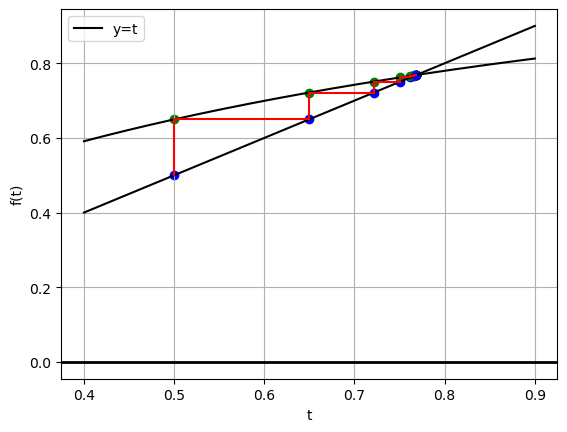

In [4]:
ax = fix_point_solver.plot_function(t_min=0.4, t_max=0.9)

plt.savefig(str(figures_dir / 'Q6_1.png'), dpi=300)
plt.show()

# Q6.3
Determine The highest real root of $f(t)=t^3-6t^2+11x-6.1$

## Graphically

In [5]:
function_6_3 = lambda t: t**3 - 6*t**2 + 11*t - 6.1
# Find Roots
df_6_3= pd.DataFrame(data=dict(t=np.linspace(0,4,100)))
df_6_3['f'] = function_6_3(df_6_3['t'])
root_6_3_graphical = df_6_3.abs().nsmallest(10, 'f').nlargest(1, 't')
display(root_6_3_graphical)

,t,f
76,3.070707,0.056766


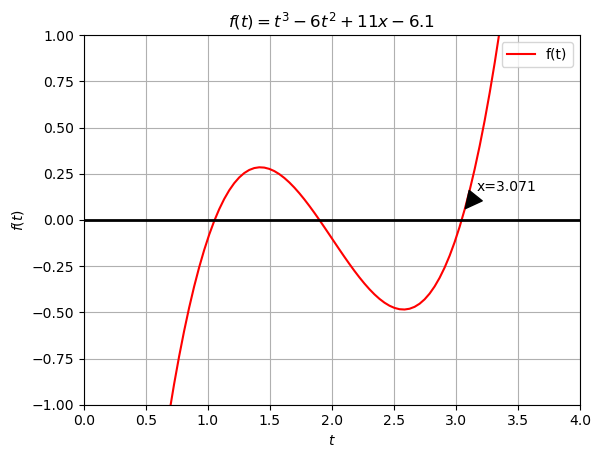

In [6]:
df_6_3.plot(x='t', y='f', color='r', label='f(t)')
plt.annotate(
    f'x={root_6_3_graphical.t.values[0]:0.3f}',
    xy=(root_6_3_graphical.t.values[0], root_6_3_graphical.f.values[0]),
    xytext=(root_6_3_graphical.t.values[0]+0.1, root_6_3_graphical.f.values[0] + 0.1),
    arrowprops=dict(facecolor='black', shrink=0.05)
)

plt.axhline(y=0, color='k', linewidth=2.0) # Highlight x-Axis
plt.title(r'$f(t)=t^3-6t^2+11x-6.1$')
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')
plt.xlim(0, 4)
plt.ylim(-1, 1)
plt.grid()
plt.savefig(str(figures_dir / 'Q6_3a.png'), dpi=300)
plt.show()

## Using the Newton-Raphson three iterations, $t_0=3.5$

In [7]:
from FindRoots.OpenMethods.NewtonRaphsonMethod import NewtonRaphsonMethod

newton_raphson_6_3 = NewtonRaphsonMethod(
    function=function_6_3,
    max_iterations=3,
    t0=3.5,
)
newton_raphson_6_3.stop_conditions.clear()
newton_raphson_6_3_df = newton_raphson_6_3.run()

2025-03-07 22:03:52,176 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:__post_init__:32 - f(t) = t**3 - 6*t**2 + 11*t - 6.1
2025-03-07 22:03:52,184 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:__post_init__:35 - f'(t) = 3*t**2 - 12*t + 11
2025-03-07 22:03:52,185 - NewtonRaphsonMethod - INFO - Numerical.py:run:122 - Starting NewtonRaphsonMethod
2025-03-07 22:03:52,186 - NewtonRaphsonMethod - INFO - Numerical.py:initialize:68 - Initial state:{'t': 3.5, 'f': 1.7750000000000004, 'df_dt': 5.75000000000000}
2025-03-07 22:03:52,187 - NewtonRaphsonMethod - INFO - Numerical.py:run:127 - Iteration 1 completed

2025-03-07 22:03:52,188 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:step:62 - t_root = 3.191e+0
2025-03-07 22:03:52,189 - NewtonRaphsonMethod - INFO - Numerical.py:run:132 - State: 
{'t': 3.19130434782609, 'f': 0.399401988986599, 'df_dt': 5.75000000000000}

2025-03-07 22:03:52,189 - NewtonRaphsonMethod - INFO - Numerical.py:run:127 - Iteration 2 completed

2025-03

In [8]:
df_to_latex(
    newton_raphson_6_3_df,
    str( data_dir / 'Q6_3_newton_raphson.tex'),
    formatting={
        't': dict(header='$t$', format='0.6f'),
        't_nm1': dict(header='$t_{n-1}$', format='0.6f'),
        'f': dict(header='$f(t)$', format='0.6f'),
        'f_nm1': dict(header='$f(t_{n-1})$', format='0.6f'),
        'df_dt': dict(header=r'$\frac{df}{dt}$', format='0.6f'),
    },
    label='tab:Q6_3_newton_raphson',
    caption=r'Q6.3: Using Newton-Raphson method with $t_0=3.5$ for finding the highest real root of $f(t)=t^3-6t^2+11x-6.1$'
)

newton_raphson_6_3_df

2025-03-07 22:03:52,213 - utils.LaTeXTools - INFO - LaTeXTools.py:df_to_latex:85 - LaTeX table exported to /home/hhj/PycharmProjects/NumericalMethods/Examples/assginment2/data/Q6_3_newton_raphson.tex


,t,f,df_dt
0,3.5,1.775,5.75000000000000
1,3.19130434782609,0.399401988986599,5.75000000000000
2,3.06869882105510,0.0518804521638021,3.25761814744801
3,3.04731673690859,0.00145603078493117,2.42635151037366


## Using Secant Method(three iterations $x_{-1}=2.5$ and $x_0=3.5$, $\delta=0.01$)

In [9]:
from FindRoots.OpenMethods.SecantMethod import SecantMethod

secant_6_3 = SecantMethod(
    function=function_6_3,
    t0=2.5,
    t1=3.5,
    max_iterations=3,
    absolute_tolerance=0.01,
)
secant_6_3.stop_conditions.clear()
secant_6_3_df = secant_6_3.run()

2025-03-07 22:03:52,303 - SecantMethod - INFO - Numerical.py:run:122 - Starting SecantMethod
2025-03-07 22:03:52,303 - SecantMethod - INFO - Numerical.py:initialize:68 - Initial state:{'t': 3.5, 't_nm1': 2.5, 'f': 1.7750000000000004, 'f_nm1': 1.7750000000000004, 'df_dt': 2.25}
2025-03-07 22:03:52,304 - SecantMethod - INFO - Numerical.py:run:127 - Iteration 1 completed

2025-03-07 22:03:52,304 - SecantMethod - INFO - Numerical.py:run:132 - State: 
{'t': 2.711111111111111, 't_nm1': 3.5, 'f': -0.45151714677640875, 'f_nm1': 1.7750000000000004, 'df_dt': 2.25}

2025-03-07 22:03:52,305 - SecantMethod - INFO - Numerical.py:run:127 - Iteration 2 completed

2025-03-07 22:03:52,305 - SecantMethod - INFO - Numerical.py:run:132 - State: 
{'t': 2.8710905034775385, 't_nm1': 2.711111111111111, 'f': -0.31010819212791496, 'f_nm1': -0.45151714677640875, 'df_dt': 2.8223456790123485}

2025-03-07 22:03:52,306 - SecantMethod - INFO - Numerical.py:run:127 - Iteration 3 completed

2025-03-07 22:03:52,307 - Sec

In [10]:
df_to_latex(
    secant_6_3_df,
    str(data_dir / 'Q6_3_secant.tex'),
    formatting={
        't': dict(header='$t$', format='0.6f'),
        't_nm1': dict(header='$t_{n-1}$', format='0.6f'),
        'f': dict(header='$f(t)$', format='0.6f'),
        'f_nm1': dict(header='$f(t_{n-1})$', format='0.6f'),
        'df_dt': dict(header=r'$\frac{df}{dt}$', format='0.6f'),
    },
    label='tab:Q6_3_secant',
    caption=r'Q6.3: Secant method for finding the highest real root of $f(t)=t^3-6t^2+11x-6.1$'
)
secant_6_3_df

2025-03-07 22:03:52,495 - utils.LaTeXTools - INFO - LaTeXTools.py:df_to_latex:85 - LaTeX table exported to /home/hhj/PycharmProjects/NumericalMethods/Examples/assginment2/data/Q6_3_secant.tex


,t,t_nm1,f,f_nm1,df_dt
0,3.500000,2.500000,1.775000,1.775000,2.250000
1,2.711111,3.500000,-0.451517,1.775000,2.250000
2,2.871091,2.711111,-0.310108,-0.451517,2.822346
3,3.221923,2.871091,0.502527,-0.310108,0.883920


## Determine roots with NumPy

In [11]:
root_6_3_numpy = np.roots([1, -6, 11, -6.1])
root_6_3_numpy

array([3.04668053, 1.89896874, 1.05435073])

# Q6.4 Determine the lowest positive root  of $f(t) = 7 \sin(t)e^{-t}-1$

## Graphically

,t,f
68,0.17017,0.000047


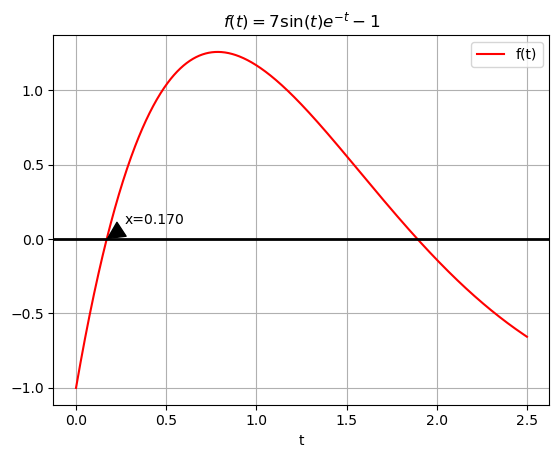

In [12]:
function_6_4 = lambda t: 7 * np.sin(t) * np.exp(-t) - 1
df_6_4 = pd.DataFrame(data=dict(t=np.linspace(0,2.5,1000)))
df_6_4['f'] = function_6_4(df_6_4['t'])

root_6_4_graphical = df_6_4.abs().nsmallest(10, 'f').nsmallest(1, 't')
display(root_6_4_graphical)

df_6_4.plot(x='t', y='f', color='r', label='f(t)')
plt.annotate(
    f'x={root_6_4_graphical.t.values[0]:0.3f}',
    xy=(root_6_4_graphical.t.values[0], root_6_4_graphical.f.values[0]),
    xytext=(root_6_4_graphical.t.values[0]+.1, root_6_4_graphical.f.values[0] + 0.1),
    arrowprops=dict(facecolor='black', shrink=0.05)
)
plt.axhline(y=0, color='k', linewidth=2.0) # Highlight x-Axis

plt.title(r'$f(t)=7 \sin(t)e^{-t}-1$')
plt.grid()
plt.savefig(str(figures_dir / 'Q6_4a.png'), dpi=300)
plt.show()

## Using Newton-Rasphson method (Three itrations, $x_0=0.3$).

In [13]:
import sympy as sp

newton_raphson_6_4 = NewtonRaphsonMethod(
    function=lambda t: 7 * sp.sin(t) * sp.exp(-t) - 1,
    max_iterations=3,
    t0=0.3,
)
newton_raphson_6_4.stop_conditions.clear()
df_6_4_newton_raphson = newton_raphson_6_4.run()

2025-03-07 22:03:53,260 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:__post_init__:32 - f(t) = -1 + 7*exp(-t)*sin(t)
2025-03-07 22:03:53,273 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:__post_init__:35 - f'(t) = -7*exp(-t)*sin(t) + 7*exp(-t)*cos(t)
2025-03-07 22:03:53,275 - NewtonRaphsonMethod - INFO - Numerical.py:run:122 - Starting NewtonRaphsonMethod
2025-03-07 22:03:53,279 - NewtonRaphsonMethod - INFO - Numerical.py:initialize:68 - Initial state:{'t': 0.3, 'f': 0.532487275720430, 'df_dt': 3.42162747046403}
2025-03-07 22:03:53,279 - NewtonRaphsonMethod - INFO - Numerical.py:run:127 - Iteration 1 completed

2025-03-07 22:03:53,281 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:step:62 - t_root = 1.444e-1
2025-03-07 22:03:53,283 - NewtonRaphsonMethod - INFO - Numerical.py:run:132 - State: 
{'t': 0.144376022721078, 'f': -0.128270820523839, 'df_dt': 3.42162747046403}

2025-03-07 22:03:53,284 - NewtonRaphsonMethod - INFO - Numerical.py:run:127 - Iteration 2 comp

In [14]:
df_to_latex(
    df_6_4_newton_raphson,
    str( data_dir / 'Q6_4_newton_raphson.tex'),
    formatting={
        't': dict(header='$t$', format='0.6f'),
        'f': dict(header='$f(t)$', format='0.6f'),
        'df_dt': dict(header=r'$\frac{df}{dt}$', format='0.6f'),
    },
    label='tab:Q6_4_newton_raphson',
    caption=r'Q6.4: Newton-Raphson method for finding the lowest positive root of $f(t) = 7 \sin(t)e^{-t}-1$'
)

df_6_4_newton_raphson

2025-03-07 22:03:53,350 - utils.LaTeXTools - INFO - LaTeXTools.py:df_to_latex:85 - LaTeX table exported to /home/hhj/PycharmProjects/NumericalMethods/Examples/assginment2/data/Q6_4_newton_raphson.tex


,t,f,df_dt
0,0.3,0.532487275720430,3.42162747046403
1,0.144376022721078,-0.128270820523839,3.42162747046403
2,0.169408537377436,-0.00372134013132319,5.12416839797029
3,0.170179276021415,-3.45896717623972e-6,4.82827760148742


## Using the secant method (Three iterations $x_{-1}=0.5$ and $x_0=0.4$)

In [15]:
secant_6_4 = SecantMethod(
    function=function_6_4,
    t0=0.5,
    t1=0.4,
    max_iterations=3,
    absolute_tolerance=0.01,
)
secant_6_4.stop_conditions.clear()
secant_6_4_df = secant_6_4.run()

2025-03-07 22:03:53,424 - SecantMethod - INFO - Numerical.py:run:122 - Starting SecantMethod
2025-03-07 22:03:53,426 - SecantMethod - INFO - Numerical.py:initialize:68 - Initial state:{'t': 0.4, 't_nm1': 0.5, 'f': np.float64(0.8272444480041989), 'f_nm1': np.float64(0.8272444480041989), 'df_dt': np.float64(2.082595694846439)}
2025-03-07 22:03:53,426 - SecantMethod - INFO - Numerical.py:run:127 - Iteration 1 completed

2025-03-07 22:03:53,427 - SecantMethod - INFO - Numerical.py:run:132 - State: 
{'t': np.float64(0.0027820233897121738), 't_nm1': 0.4, 'f': np.float64(-0.9805799636099427), 'f_nm1': np.float64(0.8272444480041989), 'df_dt': np.float64(2.082595694846439)}

2025-03-07 22:03:53,428 - SecantMethod - INFO - Numerical.py:run:127 - Iteration 2 completed

2025-03-07 22:03:53,428 - SecantMethod - INFO - Numerical.py:run:132 - State: 
{'t': np.float64(0.2182365700522152), 't_nm1': np.float64(0.0027820233897121738), 'f': np.float64(0.21841087866626174), 'f_nm1': np.float64(-0.980579963

In [16]:
df_to_latex(
    secant_6_4_df,
    str(data_dir / 'Q6_4_secant.tex'),
    formatting={
        't': dict(header='$t$', format='0.6f'),
        't_nm1': dict(header='$t_{n-1}$', format='0.6f'),
        'f': dict(header='$f(t)$', format='0.6f'),
        'f_nm1': dict(header='$f(t_{n-1})$', format='0.6f'),
        'df_dt': dict(header=r'$\frac{df}{dt}$', format='0.6f'),
    },
    label='tab:Q6_4_secant',
    caption=r'Q6.4: Secant method for finding the lowest positive root of $f(t) = 7 \sin(t)e^{-t}-1$'
)

secant_6_4_df

2025-03-07 22:03:53,540 - utils.LaTeXTools - INFO - LaTeXTools.py:df_to_latex:85 - LaTeX table exported to /home/hhj/PycharmProjects/NumericalMethods/Examples/assginment2/data/Q6_4_secant.tex


,t,t_nm1,f,f_nm1,df_dt
0,0.400000,0.500000,0.827244,0.827244,2.082596
1,0.002782,0.400000,-0.980580,0.827244,2.082596
2,0.218237,0.002782,0.218411,-0.980580,4.551215
3,0.178989,0.218237,0.042003,0.218411,5.564936


## Using Modified secant method (Five iterations $x_{0}=0.3$ and $\delta=0.01$)

In [17]:
from FindRoots.OpenMethods.ModifiedSecantMethod import ModifiedSecantMethod

modified_secant_6_4 = ModifiedSecantMethod(
    function=function_6_4,
    t0=0.3,
    dt=-0.01,
    max_iterations=5,
    absolute_tolerance=0.01,
)
modified_secant_6_4.stop_conditions.clear()
modified_secant_6_4_df = modified_secant_6_4.run()

2025-03-07 22:03:53,616 - ModifiedSecantMethod - INFO - Numerical.py:run:122 - Starting ModifiedSecantMethod
2025-03-07 22:03:53,616 - ModifiedSecantMethod - INFO - Numerical.py:initialize:68 - Initial state:{'t': 0.3, 'f': np.float64(0.53248727572043)}
2025-03-07 22:03:53,617 - ModifiedSecantMethod - INFO - Numerical.py:run:127 - Iteration 1 completed

2025-03-07 22:03:53,618 - ModifiedSecantMethod - INFO - Numerical.py:run:132 - State: 
{'t': np.float64(0.1420997791778839), 'f': np.float64(-0.13996576920865722)}

2025-03-07 22:03:53,618 - ModifiedSecantMethod - INFO - Numerical.py:run:127 - Iteration 2 completed

2025-03-07 22:03:53,619 - ModifiedSecantMethod - INFO - Numerical.py:run:132 - State: 
{'t': np.float64(0.16958925005964157), 'f': np.float64(-0.0028489993350692133)}

2025-03-07 22:03:53,619 - ModifiedSecantMethod - INFO - Numerical.py:run:127 - Iteration 3 completed

2025-03-07 22:03:53,620 - ModifiedSecantMethod - INFO - Numerical.py:run:132 - State: 
{'t': np.float64(0.1

In [18]:
df_to_latex(
    modified_secant_6_4_df,
    str(data_dir / 'Q6_4_modified_secant.tex'),
    formatting={
        't': dict(header='$t$', format='0.6f'),
        'f': dict(header='$f(t)$', format='0.6f'),
    },
    label='tab:Q6_4_modified_secant',
    caption=r'Q6.4: Modified secant method for finding the lowest positive root of $f(t) = 7 \sin(t)e^{-t}-1$'
)

modified_secant_6_4_df

2025-03-07 22:03:53,760 - utils.LaTeXTools - INFO - LaTeXTools.py:df_to_latex:85 - LaTeX table exported to /home/hhj/PycharmProjects/NumericalMethods/Examples/assginment2/data/Q6_4_modified_secant.tex


,t,f
0,0.300000,5.324873e-01
1,0.142100,-1.399658e-01
2,0.169589,-2.848999e-03
3,0.170187,3.258035e-05
4,0.170180,-3.969185e-07
5,0.170180,4.832161e-09


# Q6.11
## (a) apply the Newton-Raphson method to the function $f(t)= \tanh(t^2-9)$ to evaluate the real root at x=3. Use initial guess $t_0=3.2$ and take minimum of three iterations

In [19]:
newton_raphson_6_11_a = NewtonRaphsonMethod(
    function=lambda t: sp.tanh(t**2 - 9),
    absolute_tolerance=1e-6,
    t0=3.2,
)
newton_raphson_6_11_a_df = newton_raphson_6_11_a.run().astype(float)

2025-03-07 22:03:53,912 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:__post_init__:32 - f(t) = tanh(t**2 - 9)
2025-03-07 22:03:53,913 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:__post_init__:35 - f'(t) = 2*t*(1 - tanh(t**2 - 9)**2)
2025-03-07 22:03:53,915 - NewtonRaphsonMethod - INFO - Numerical.py:run:122 - Starting NewtonRaphsonMethod
2025-03-07 22:03:53,919 - NewtonRaphsonMethod - INFO - Numerical.py:initialize:68 - Initial state:{'t': 3.2, 'f': 0.845455595726681, 'df_dt': 1.82531094818844}
2025-03-07 22:03:53,921 - NewtonRaphsonMethod - INFO - Numerical.py:run:127 - Iteration 1 completed
Stop condition [StopIfZero: Stop when 'f' equals 0 (abs_tol=1e-06) for 3 iterations] NOT met: Variable f:0.845456 != 0 (abs diff: 0.845456 > 1e-06)
Stop condition [StopIfZero: Stop when 'df_dt' equals 0 (abs_tol=1e-06) for 0 iterations] NOT met: Variable df_dt:1.82531 != 0 (abs diff: 1.82531 > 1e-06)
Stop condition [StopIfNaN: Stop if any of ['f', 't', 'df_dt'] is NaN] NOT met: 

In [20]:
df_to_latex(
    newton_raphson_6_11_a_df,
    str(data_dir / 'Q6_11_newton_raphson.tex'),
    formatting={
        't': dict(header='$t$', format='0.6g'),
        't_nm1': dict(header='$t_{n-1}$', format='0.6f'),
        'f': dict(header='$f(t)$', format='0.6f'),
        'f_nm1': dict(header='$f(t_{n-1})$', format='0.6f'),
        'df_dt': dict(header=r'$\frac{df}{dt}$', format='0.6f'),
    },
    label='tab:Q6_11_newton_raphson',
    caption=r'Q6.11: Newton-Raphson method for finding the real root of $f(t)= \tanh(t^2-9)$ with initial guess $t_0=3.2$'
)

newton_raphson_6_11_a_df

2025-03-07 22:03:54,182 - utils.LaTeXTools - INFO - LaTeXTools.py:df_to_latex:85 - LaTeX table exported to /home/hhj/PycharmProjects/NumericalMethods/Examples/assginment2/data/Q6_11_newton_raphson.tex


,t,f,df_dt
0,3.200000e+00,0.845456,1.825311e+00
1,2.736816e+00,-0.906911,1.825311e+00
2,3.670197e+00,0.999738,9.716402e-01
3,-2.564133e+02,1.000000,3.843912e-03
4,5.954263e+138,1.000000,-1.679469e-139
5,5.954263e+138,1.000000,3.906250e-03


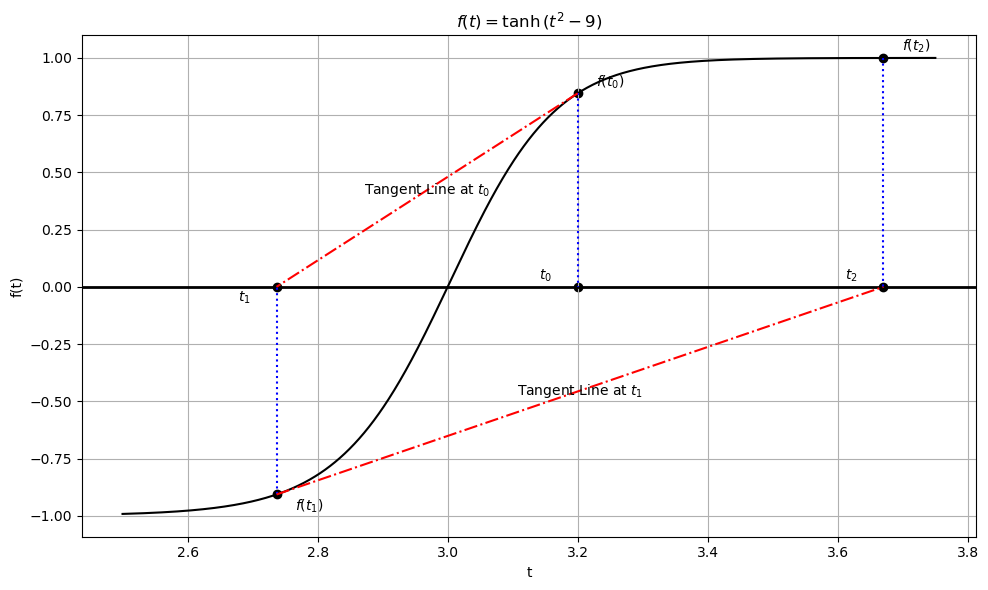

In [21]:
# Create the figure and axes first
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the function
ax = newton_raphson_6_11_a.plot_function(t_min=2.5, t_max=3.75, ax=ax)
#
# # Plot step points and tangent lines
ax = newton_raphson_6_11_a.plot_step_point(0, ax=ax, x_offset=0.05, y_offset=0.05)
ax = newton_raphson_6_11_a.plot_tangent(0, ax=ax)
ax = newton_raphson_6_11_a.plot_step_point(1, ax=ax, x_offset=0.05, y_offset=-0.05)
ax = newton_raphson_6_11_a.plot_tangent(1, ax=ax)
ax = newton_raphson_6_11_a.plot_step_point(2, ax=ax, x_offset=0.05, y_offset=0.05)


# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save the figure

plt.savefig( str(figures_dir / 'Q6_11_a.png'), dpi=300)

# Show the plot
plt.show()

# Q6.12 The polymonial $f(t)=0.0074t^4-0.284t^3+3.355t^2-12.183t+5$ has real root between 12 and 20. Apply Newton-Raphson Method to this function using initial guess $t_0=16.15$

In [22]:
function_6_12 = lambda t: 0.0074*t**4 - 0.284*t**3 + 3.355*t**2 - 12.183*t + 5
newton_raphson_6_12 = NewtonRaphsonMethod(
    function=function_6_12,
    absolute_tolerance=1e-6,
    t0=16.15,
)
newton_raphson_6_12_df = newton_raphson_6_12.run().astype(float)

2025-03-07 22:03:55,016 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:__post_init__:32 - f(t) = 0.0074*t**4 - 0.284*t**3 + 3.355*t**2 - 12.183*t + 5
2025-03-07 22:03:55,025 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:__post_init__:35 - f'(t) = 0.0296*t**3 - 0.852*t**2 + 6.71*t - 12.183
2025-03-07 22:03:55,027 - NewtonRaphsonMethod - INFO - Numerical.py:run:122 - Starting NewtonRaphsonMethod
2025-03-07 22:03:55,028 - NewtonRaphsonMethod - INFO - Numerical.py:initialize:68 - Initial state:{'t': 16.15, 'f': -9.574454853749984, 'df_dt': -1.35368209999996}
2025-03-07 22:03:55,030 - NewtonRaphsonMethod - INFO - Numerical.py:run:127 - Iteration 1 completed
Stop condition [StopIfZero: Stop when 'f' equals 0 (abs_tol=1e-06) for 3 iterations] NOT met: Variable f:-9.57445 != 0 (abs diff: 9.57445 > 1e-06)
Stop condition [StopIfZero: Stop when 'df_dt' equals 0 (abs_tol=1e-06) for 0 iterations] NOT met: Variable df_dt:-1.35368 != 0 (abs diff: 1.35368 > 1e-06)
Stop condition [StopIf

In [23]:
df_to_latex(
    newton_raphson_6_12_df,
    str(data_dir / 'Q6_12_newton_raphson.tex'),
    formatting={
        't': dict(header='$t$', format='0.6f'),
        'f': dict(header='$f(t)$', format='0.6f'),
        'df_dt': dict(header=r'$\frac{df}{dt}$', format='0.6f'),
    },
    label='tab:Q6_12_newton_raphson',
    caption=r'Q6.12: Newton-Raphson method for finding the real root of $f(t)=0.0074t^4-0.284t^3+3.355t^2-12.183t+5$ with initial guess $t_0=16.15$'
)

newton_raphson_6_12_df

2025-03-07 22:03:55,125 - utils.LaTeXTools - INFO - LaTeXTools.py:df_to_latex:85 - LaTeX table exported to /home/hhj/PycharmProjects/NumericalMethods/Examples/assginment2/data/Q6_12_newton_raphson.tex


,t,f,df_dt
0,16.150000,-9.574455e+00,-1.353682
1,9.077102,8.678763e+00,-1.353682
2,-4.021010,1.286318e+02,0.662596
3,-1.676451,3.624995e+01,-54.863959
4,-0.280396,8.686147e+00,-25.965987
5,0.334244,1.292213e+00,-14.132095
6,0.463023,5.041597e-02,-10.034304
7,0.468470,8.807436e-05,-9.255836
8,0.468480,2.704077e-10,-9.223505
9,0.468480,0.000000e+00,-9.223449


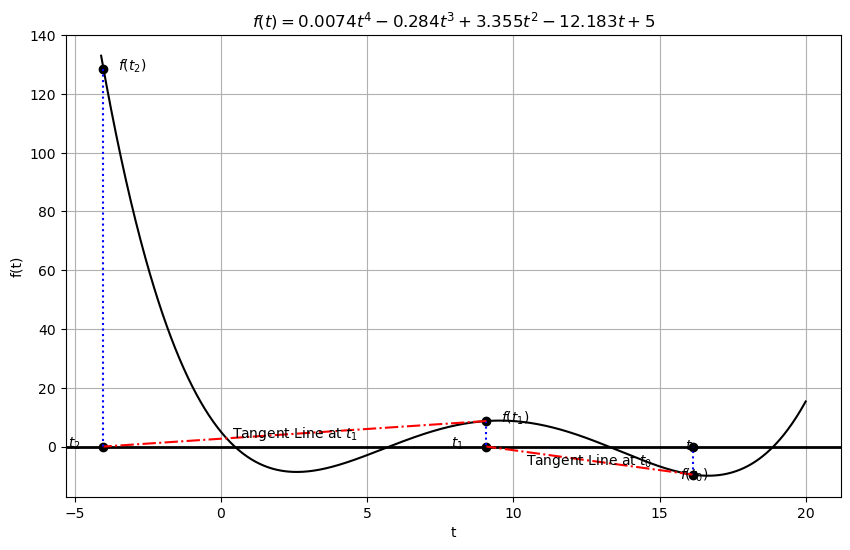

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = newton_raphson_6_12.plot_function(t_min=-4.1, t_max=20, ax=ax)
ax = newton_raphson_6_12.plot_step_point(0, ax=ax, x_offset=0.05, y_offset=0.05)
ax = newton_raphson_6_12.plot_tangent(0, ax=ax)

ax = newton_raphson_6_12.plot_step_point(1, ax=ax, x_offset=1, y_offset=1)
ax = newton_raphson_6_12.plot_tangent(1, ax=ax)
ax = newton_raphson_6_12.plot_step_point(2, ax=ax, x_offset=1, y_offset=1)

plt.savefig(str(figures_dir / 'Q6_12_a.png'), dpi=300)

In [25]:
newton_raphson_6_12b = NewtonRaphsonMethod(
    function=function_6_12,
    absolute_tolerance=1e-6,
    t0=20,
)
newton_raphson_6_12b_df = newton_raphson_6_12b.run().astype(float)

2025-03-07 22:03:56,141 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:__post_init__:32 - f(t) = 0.0074*t**4 - 0.284*t**3 + 3.355*t**2 - 12.183*t + 5
2025-03-07 22:03:56,142 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:__post_init__:35 - f'(t) = 0.0296*t**3 - 0.852*t**2 + 6.71*t - 12.183
2025-03-07 22:03:56,144 - NewtonRaphsonMethod - INFO - Numerical.py:run:122 - Starting NewtonRaphsonMethod
2025-03-07 22:03:56,148 - NewtonRaphsonMethod - INFO - Numerical.py:initialize:68 - Initial state:{'t': 20, 'f': 15.340000000000003, 'df_dt': 18.0170000000001}
2025-03-07 22:03:56,151 - NewtonRaphsonMethod - INFO - Numerical.py:run:127 - Iteration 1 completed
Stop condition [StopIfZero: Stop when 'f' equals 0 (abs_tol=1e-06) for 3 iterations] NOT met: Variable f:15.34 != 0 (abs diff: 15.34 > 1e-06)
Stop condition [StopIfZero: Stop when 'df_dt' equals 0 (abs_tol=1e-06) for 0 iterations] NOT met: Variable df_dt:18.0170 != 0 (abs diff: 18.017 > 1e-06)
Stop condition [StopIfNaN: Stop i

In [26]:
df_to_latex(
    newton_raphson_6_12b_df,
    str(data_dir / 'Q6_12_newton_raphson_b.tex'),
    formatting={
        't': dict(header='$t$', format='0.6f'),
        'f': dict(header='$f(t)$', format='0.6f'),
        'df_dt': dict(header=r'$\frac{df}{dt}$', format='0.6f'),
    },
    label='tab:Q6_12_newton_raphson_b',
    caption=r'Q6.12: Newton-Raphson method for finding the real root of $f(t)=0.0074t^4-0.284t^3+3.355t^2-12.183t+5$ with initial guess $t_0=20$'
)

newton_raphson_6_12b_df

2025-03-07 22:03:56,284 - utils.LaTeXTools - INFO - LaTeXTools.py:df_to_latex:85 - LaTeX table exported to /home/hhj/PycharmProjects/NumericalMethods/Examples/assginment2/data/Q6_12_newton_raphson_b.tex


,t,f,df_dt
0,20.000000,1.534000e+01,18.017000
1,19.148582,2.767810e+00,18.017000
2,18.912612,1.811975e-01,11.729493
3,18.894863,9.821348e-04,10.209278
4,18.894766,2.939666e-08,10.098691
5,18.894766,2.842171e-13,10.098087
6,18.894766,-2.842171e-13,10.098087
7,18.894766,2.842171e-13,10.098087


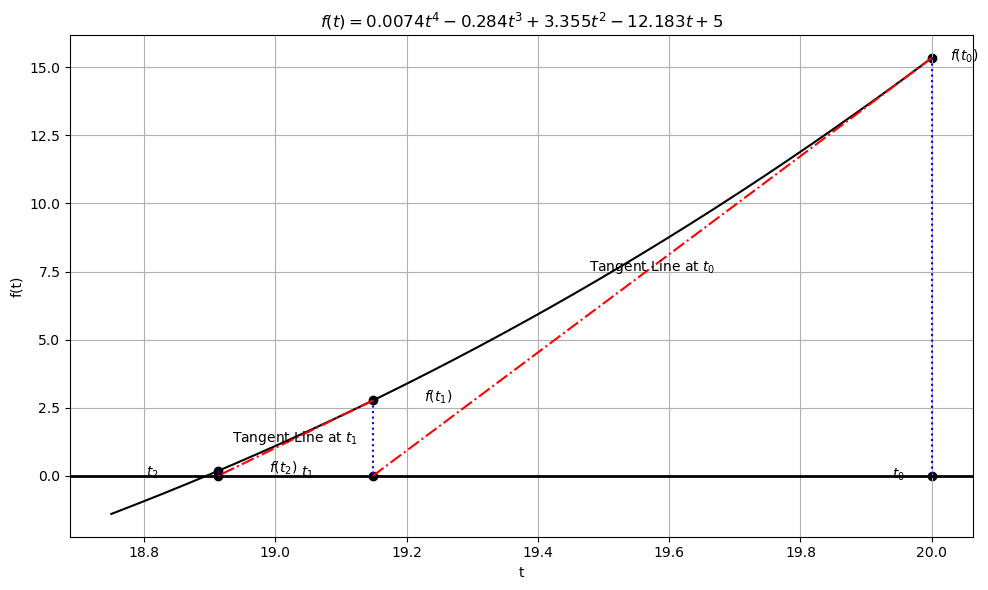

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = newton_raphson_6_12b.plot_function(t_min=18.75, t_max=20, ax=ax)
ax = newton_raphson_6_12b.plot_step_point(0, ax=ax, x_offset=0.05, y_offset=0.05)
ax = newton_raphson_6_12b.plot_tangent(0, ax=ax)
ax = newton_raphson_6_12b.plot_step_point(1, ax=ax, x_offset=0.1, y_offset=0.1)
ax = newton_raphson_6_12b.plot_tangent(1, ax=ax)
ax = newton_raphson_6_12b.plot_step_point(2, ax=ax, x_offset=0.1, y_offset=0.1)

plt.tight_layout()
plt.savefig(str(figures_dir / 'Q6_12_b.png'), dpi=300)